<a href="https://colab.research.google.com/github/AreYouRuben/DS_Team24/blob/main/Machine-Learning-Santander/Formula1_ML_Bedu_Santander_DSTeam11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fórmula 1: Un Acercamiento a Modelos Predictivos y de Agrupamiento

En este notebook se encuentran diversos problemas presentados en la Fórmula 1 atacados de distintas maneras con el uso de análisis de datos.

 - Manuel García Garduño
  - Luis Rubén Chávez Carrillo
  - Raúl González Cruz
  - Daniel Butron Otero

### Problemas de clasificación
- Problema: Predicir la posición final del conductor.
    - Algoritmos: Árboles de desición, bosques aleatorios, bagging y XGBoost.
- Problema: Clasificar si el conductor llega a podio o no. 
    - Algoritmos: Random Forest y Naive Bayes

### Problemas de regresión
- Problema: Predecir la posición final del conductor.
    - Algoritmos: Regresión polinomial.

### Problemas de agrupamiento
- Problema: Agrupar los circuitos en nivel de entretenimiento
    - Algoritmos: K-means

### Problemas de optimización
- Problema: Encontrar la ruta más corta de recorrer todos los circuitos en una temporada
    - Algoritmos: Algoritmo genético.


## Importación de datos
Antes de comenzar el análisis de nuestros datos vamos a importar las bases de datos que serán utilizadas en el proyecto.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree as treeClassifier
from sklearn.ensemble import RandomForestClassifier as forest
from sklearn.linear_model import LinearRegression

In [2]:
path ='https://raw.githubusercontent.com/AreYouRuben/DS_Team24/main/Analisis_Datos_Python_Santander/f1_dataset/'
filenames = ["circuits",
             "constructor_results","constructor_standings",
            "constructors",
             "driver_standings",
             "drivers","lap_times",
             "pit_stops",
             "qualifying",
             "races",
             "results"
             ,"seasons",
             "status"]

dfs = []
for filename in filenames:
  complete_path = path + filename + ".csv"
  #print(complete_path)
  df = pd.read_csv(complete_path, encoding="latin1")
  dfs.append(df)

df_dictionary = {}
for filename in filenames:
  complete_path = path + filename + ".csv"
  df_dictionary[filename] = pd.read_csv(complete_path, encoding="latin1")

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/AreYouRuben/DS_Team24/main/Machine-Learning-Santander/is_Podium/is_Podium.csv')
df

,raceId,driverId,stop,lap,constructorId,grid,laps,position,circuitId,podium
0,841,1,2,36,1,2,58,2,1,1
1,841,2,2,30,4,18,57,12,1,0
2,841,4,3,42,6,5,58,4,1,0
3,841,13,3,48,6,8,58,7,1,0
4,841,15,2,37,205,20,56,13,1,0
...,...,...,...,...,...,...,...,...,...,...
3516,1054,847,3,28,3,11,65,16,75,0
3517,1054,849,3,24,3,18,64,18,75,0
3518,1054,852,3,21,213,14,65,15,75,0
3519,1054,853,4,43,210,20,64,19,75,0


## Problemas de Clasificación

### Conductor llega al podio

La Fórmula 1 puede es el deporte de motor más popular del mundo. Sin embargo, es algo predecible. Por otro lado, factores como el conductor, el equipo, la posición inicial o la estrategia de paradas en pits pueden modificar los resultados totalmente de una carrera. 

Por ello, se decide atacar este problema con un dataset previamente limpio y aplicándole algoritmos clasiicadores para predecir si el conductor va a lograr un posicionamiento final dentro del podio.

- Problema: Clasificar si el conductor llega a podio o no. 
    - Algoritmos: Random Forest y Naive Bayes

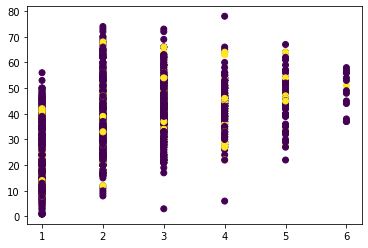

In [4]:
x = df[['circuitId','driverId','stop','lap','constructorId','grid','laps']]
y = df['podium']
plt.scatter(x['stop'],x['lap'],c=y)
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, stratify=y, random_state=12)

#### Clasificadores: Random Forest

In [5]:
bosque = forest(n_estimators = 800, random_state = 12)
bosque.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [6]:
y_pred = bosque.predict(x_test)

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix
resultado = confusion_matrix(y_test, y_pred)
print(resultado)
a = accuracy_score(y_test, y_pred)
a

[[693  39]
 [ 46 103]]


0.9035187287173666

In [8]:
from sklearn.metrics import confusion_matrix

##### Solo puedo calcular accuracy con multiclase

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

resultado = confusion_matrix(y_test, y_pred)
print(resultado)
TN, FP, FN, TP = resultado.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))

acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

## En un ejemplo de negativos para productos que no pasan pruebas de calidad
# usaría arbol de decisión puesto que tiene la especificidad más alta de
# los 4 clasificadores

[[693  39]
 [ 46 103]]
True positives: 103
True negatives: 693
False positives: 39
False negative: 46
Precision:90.35187287173666%
Sensibilidad:69.12751677852349%
Especificidad:94.67213114754098%


#### Clasificadores: Naive Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB

In [10]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train, y_train) 
y_pred = NaiveBayes.predict(x_test)

In [11]:
resultado = confusion_matrix(y_test, y_pred)
print(resultado)
(TN, FP, FN, TP) = resultado.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))

acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

[[673  59]
 [ 62  87]]
True positives: 87
True negatives: 673
False positives: 59
False negative: 62
Precision:86.2656072644722%
Sensibilidad:58.38926174496645%
Especificidad:91.93989071038251%


#### Validación: Random Forest

In [12]:
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
k = 5
kf = KFold(k,True, 12)
model = forest(n_estimators = 800, random_state = 12)
 
acc_score = []
sen_score = []
spec_score = []

for train_index , test_index in kf.split(x):
  x_train , x_test = x.iloc[train_index,:],x.iloc[test_index,:]
  y_train , y_test = y[train_index] , y[test_index]
    
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)

  resultado = confusion_matrix(y_test, y_pred)

  (TN, FP, FN, TP) = resultado.ravel()

  acc = calcularAccuracy(TP, TN, FP, FN)
  sen = calcularSensibilidad(TP, TN, FP, FN)
  spec = calcularEspecificidad(TP, TN, FP, FN)

  acc_score.append(acc)
  sen_score.append(sen)
  spec_score.append(spec)

avg_acc_score = sum(acc_score)/k
avg_sen_score = sum(sen_score)/k
avg_spec_score = sum(spec_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))
print('\n')
print('Sensitivity of each fold - {}'.format(sen_score))
print('Avg sensitivity : {}'.format(avg_sen_score))
print('\n')
print('Specificity of each fold - {}'.format(spec_score))
print('Avg specificity : {}'.format(avg_spec_score))

accuracy of each fold - [90.2127659574468, 90.9090909090909, 89.0625, 87.7840909090909, 89.48863636363636]
Avg accuracy : 89.491416827853


Sensitivity of each fold - [62.8099173553719, 67.71653543307087, 57.49999999999999, 60.317460317460316, 63.10679611650486]
Avg sensitivity : 62.290141844481596


Specificity of each fold - [95.8904109589041, 96.01386481802426, 95.54794520547945, 93.77162629757785, 94.0099833610649]
Avg specificity : 95.04676612821011


#### Validación: Naive Bayes

In [13]:
k = 4
kf = KFold(k,True, 12)
model = GaussianNB()
 
acc_score = []
sen_score = []
spec_score = []

for train_index , test_index in kf.split(x):
  x_train , x_test = x.iloc[train_index,:],x.iloc[test_index,:]
  y_train , y_test = y[train_index] , y[test_index]
    
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)


  resultado = confusion_matrix(y_test, y_pred)

  (TN, FP, FN, TP) = resultado.ravel()

  acc = calcularAccuracy(TP, TN, FP, FN)
  sen = calcularSensibilidad(TP, TN, FP, FN)
  spec = calcularEspecificidad(TP, TN, FP, FN)

  acc_score.append(acc)
  sen_score.append(sen)
  spec_score.append(spec)

avg_acc_score = sum(acc_score)/k
avg_sen_score = sum(sen_score)/k
avg_spec_score = sum(spec_score)/k
 
print('Accuracy - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))
print('\n')
print('Sensitivity - {}'.format(sen_score))
print('Avg sensitivity : {}'.format(avg_sen_score))
print('\n')
print('Specificity - {}'.format(spec_score))
print('Avg specificity : {}'.format(avg_spec_score))

Accuracy - [86.9466515323496, 85.45454545454545, 87.1590909090909, 86.13636363636363]
Avg accuracy : 86.4241628830874


Sensitivity - [62.5, 59.756097560975604, 69.79865771812081, 65.9090909090909]
Avg sensitivity : 64.49096154704682


Specificity - [92.04389574759945, 91.34078212290503, 90.69767441860465, 89.70588235294117]
Avg specificity : 90.94705866051257


## Problemas de Regresión


### Ajuste de regresión Polinomial y algoritmo de validación cruzada

- Problema: Predecir la posición final del conductor.
    - Algoritmos: Regresión polinomial.

Buscamos implementar un modelos de regresió lineal para predecir la posición final de un conductor en la carrera. El problema al que nos enfrentamos es que no tenemos demasiadas variables numéricas que podamos utilizar en nuestra regresión para nuestros fines predictivos. Quizá la variable más razonable a considerar es la posición del conductor en la clasifiación previa a la carrera, pero más allá de esta variable no consideramos que haya otras variables numéricas que tengan un poder predictivo considerables o que no estén fuertemente correlacionadas con la variable de la posición en la clasifiación. Entonces primero vamos a ajustar un modelo de regresión lineal simple y luego veremos si hay alguna forma de crear un modelo de regresión lineal múltiple.

In [14]:
posicion_correlacion = pd.merge(df_dictionary['results'], df_dictionary['qualifying'],  how='inner', left_on=['raceId','driverId'], right_on = ['raceId','driverId'])
posicion_correlacion = posicion_correlacion[['position_y','positionOrder']]
posicion_correlacion.columns = ['QualifyPosition', 'RacePosition']
posicion_correlacion

,QualifyPosition,RacePosition
0,1,1
1,5,2
2,7,3
3,12,4
4,3,5
...,...,...
8749,11,16
8750,19,17
8751,18,18
8752,20,19


La correlación de Pearson entre la posicón de clasificación y la posición final de la carrera es de:  0.5642021228735716


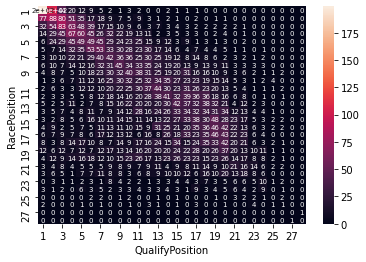

In [15]:
tabla = pd.crosstab(posicion_correlacion.RacePosition,posicion_correlacion.QualifyPosition, margins = False)
sns.heatmap(tabla, annot=True, annot_kws={"size": 7})
print("La correlación de Pearson entre la posicón de clasificación y la posición final de la carrera es de: ",
      posicion_correlacion['QualifyPosition'].corr(posicion_correlacion['RacePosition']))

Podemos observar que sí existe una correlación entre la posición en la clasifiación previa a la carrera y la posición final en la carrera. Resulta entonces razonable tratar de ajustar un modelo de regresión lineal simple con la posición en la clasificación como variable explicativa.

In [16]:
variables_explicativas = posicion_correlacion['QualifyPosition'].to_frame()
variables_explicativas.columns = ['X1'] # Cambié el nombre de la columna porque será útil posteriormente
lr = LinearRegression()
lr.fit(variables_explicativas, posicion_correlacion['RacePosition']) # Ajustamos el modelo lineal
position_predict = lr.predict(variables_explicativas) # Predecimos la posición en la carrera a partir de la posición en la clasifiación
posicion_correlacion['Prediction'] = position_predict # Agregamos nuestras predicciones a la tabla
posicion_correlacion

,QualifyPosition,RacePosition,Prediction
0,1,1,5.509276
1,5,2,7.771432
2,7,3,8.902510
3,12,4,11.730206
4,3,5,6.640354
...,...,...,...
8749,11,16,11.164667
8750,19,17,15.688980
8751,18,18,15.123441
8752,20,19,16.254519


In [17]:
sum((posicion_correlacion.RacePosition - posicion_correlacion.Prediction)**2) # Calculamos la suma del cuadrado de los errores de nuestras predicciones

241309.51598884372

Basta con observar la primera predicción para darnos cuenta de que nuestro modelo de regresión lineal simple es bastante mediocre para predecir la posición final del piloto en la carrera. Por ejemplo, nuestro modelo estima que si un conductor se clasifica en primer lugar terminará en quinta o sexta posición. Quienes conocemos este deporte sabemos que eso no parece ser una buena estimación porque la mayoría de las veces esto no sucede. ¿Podemos mejorar nuestro modelo? Ya dijimos anteriormente que nuestra base de datos no tiene muchas variables numéricas que tengan poder predictivo en este contexto, pero podemos aprovechar el poder predictivo de la variable que ya hemos elegido, a saber, la posición en la clasificación, de una manera distinta. Podriamos tratar de ajustar un modelo de regresión, ya no simple, sino múltiple. ¿Cómo es posible hacer esto si sólo contamos con una variable explicativa? Podríamos crear una nueva variable que sea el cuadrado de la variable explicativa que ya tenemos. Esto quizá aumente la precisión de las predicciones de nuestro modelo puesto que ahora en lugar de ajustar una linea recta a los datos estamos ajustando el polinomio de segundo grado que minimiza la suma del cuadrado de los errores. Podríamos ir incluso más allá y tratar de ajustar un polinomio de grado $n$.

In [18]:
variables_explicativas['X2'] = posicion_correlacion['QualifyPosition']**2
print(variables_explicativas)

      X1   X2
0      1    1
1      5   25
2      7   49
3     12  144
4      3    9
...   ..  ...
8749  11  121
8750  19  361
8751  18  324
8752  20  400
8753  15  225

[8754 rows x 2 columns]


In [19]:
lr = LinearRegression()
lr.fit(variables_explicativas, posicion_correlacion['RacePosition']) # Ajustamos el modelo lineal
position_predict = lr.predict(variables_explicativas) # Predecimos la posición en la carrera a partir de la posición en la clasifiación
posicion_correlacion['Prediction'] = position_predict # Agregamos nuestras predicciones a la tabla
posicion_correlacion

,QualifyPosition,RacePosition,Prediction
0,1,1,4.787674
1,5,2,7.739882
2,7,3,9.095519
3,12,4,12.133246
4,3,5,6.303934
...,...,...,...
8749,11,16,11.565856
8750,19,17,15.542789
8751,18,18,15.115945
8752,20,19,15.949555


In [20]:
sum((posicion_correlacion.RacePosition - posicion_correlacion.Prediction)**2) # Calculamos la suma del cuadrado de los errores de nuestras predicciones

240001.52389944677

La suma del cuadrado de los errores de nuestro primer modelo es de $241309.51598884372$, mientras que en nuestro segundo modelo es de $240001.52389944677$. Esto quiere decir que nuestro segundo modelo tiene mayor presición. De hecho, siempre que aumentemos en uno el grado del polinomio que estamos ajustando tendremos predicciones que son, al menos, tan buenas como las anteriores. Esto se debe a que la familia de polinomios $p_{1}(x) = \beta_{0} + \beta_{1}x + ... + \beta_{n}x^{n-1} + \beta_{n}x^n$ contiene en su totalidad a los polinomio de la forma $p_{2}(x) = \beta_{0} + \beta_{1}x + ... + \beta_{n}x^{n-1}$ pues bastaría asignar a $\beta_{n}=0$ en $p_{1}$ para que ambos conjuntos de polinomios coincidieran. Ahora ajustemos un polinomio de grado tres y veamos qué pasa.

In [21]:
variables_explicativas['X3'] = posicion_correlacion['QualifyPosition']**3
print(variables_explicativas)

      X1   X2    X3
0      1    1     1
1      5   25   125
2      7   49   343
3     12  144  1728
4      3    9    27
...   ..  ...   ...
8749  11  121  1331
8750  19  361  6859
8751  18  324  5832
8752  20  400  8000
8753  15  225  3375

[8754 rows x 3 columns]


In [22]:
lr = LinearRegression()
lr.fit(variables_explicativas, posicion_correlacion['RacePosition']) # Ajustamos el modelo lineal
position_predict = lr.predict(variables_explicativas) # Predecimos la posición en la carrera a partir de la posición en la clasifiación
posicion_correlacion['Prediction'] = position_predict # Agregamos nuestras predicciones a la tabla
posicion_correlacion

,QualifyPosition,RacePosition,Prediction
0,1,1,4.284861
1,5,2,7.961079
2,7,3,9.384995
3,12,4,12.145124
4,3,5,6.278007
...,...,...,...
8749,11,16,11.659029
8750,19,17,15.337604
8751,18,18,14.859502
8752,20,19,15.840022


In [23]:
sum((posicion_correlacion.RacePosition - posicion_correlacion.Prediction)**2) # Calculamos la suma del cuadrado de los errores de nuestras predicciones

239385.5715207589

#### Validación

Como habíamos ya explicado anteriormente, se cumple que agregar un grado al polinomio nos da mayor precisión en nuestra predicción. ¿Por qué no seguir aumentando el grado del polinomio, por ejemplo, un polinomio de grado 20 para seguir aumentando la precisión de nuestras predicciones? Porque estaríamos corriendo el riesgo de sobreentrenar nuestro modelo, es decir, crearíamos un modelo que se ajusta tan bien a los datos de entrenamiento que se vuelve malo prediciendo para datos que no formaban parte del entrenamiento. Debe entonces haber un grado de polinomio óptimo que no sobreentrene y que nos dé la mayor capacidad de generalización. Trataremos de encontrar el grado del polinomio óptimo a través de **leave one out cross validation**. 

In [24]:
# df.sample(frac=1)
def cross_validate(X): # X es un dataframe donde la última columna tiene la variable a predecir y el resto las variables explicativas
  X = X.sample(frac=1).reset_index(drop=True) # Revolvemos los datos
  errores = []
  for i in range(len(X)):
    testing = X.iloc[i:i+1] # Seleccionamos el bloque de prueba
    training = X[~X.index.isin(testing.index)] # Seleccionamos el bloque de entrenamiento
    lr = LinearRegression() # Inicializa la regresión
    lr.fit(training.iloc[:,:-1], training.iloc[:,-1:]) # Ajusta el modelo a los datos de entrenamiento
    predictions = lr.predict(testing.iloc[:,:-1]) # Aplica la regresión a los datos de prueba
    errores.append(sum((testing.iloc[:,-1:].values - predictions)**2)) # Almacena la suma del cuadrado de los errores del modelo en una lista

  return np.mean(errores)

Para llamar a la función ```cross_validate``` vamos a crear cinco dtaframes cada una de ellas con una cantidad distinta de variables explicativas. La más simple será aquella que sólo tiene la posición en la clasificación. La última tabla será aquella que tiene a la variable de posición en clasificación elvada al cuadrado, al cubo, a la cuarta y a la quinta potencia.

In [25]:
posicion_correlacion = pd.merge(df_dictionary['results'], df_dictionary['qualifying'],  how='inner', left_on=['raceId','driverId'], right_on = ['raceId','driverId'])
posicion_correlacion = posicion_correlacion[['position_y','positionOrder']]
posicion_correlacion.columns = ['QualifyPosition', 'RacePosition']

aux = posicion_correlacion.RacePosition
del posicion_correlacion['RacePosition']
posicion_correlacion.columns = ['X1']
posicion_correlacion['X2'] = posicion_correlacion['X1']**2
posicion_correlacion['X3'] = posicion_correlacion['X1']**3
posicion_correlacion['X4'] = posicion_correlacion['X1']**4
posicion_correlacion['X5'] = posicion_correlacion['X1']**5

tablas_explicativas = []
for i in range(0,5):
  tabla = posicion_correlacion.iloc[:,0:i+1]
  tabla['Y'] = aux
  tablas_explicativas.append(tabla)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Ahora sólo resta aplicar la función ```cross_validate``` a cada una de las tablas contenidas en ```tablas_explicativas``` para saber cuál modelo tiene mayor capacidad de generalización.

In [26]:
print("Promedio de error cuadrado para polinomio de grado ", 1, " : ",cross_validate(tablas_explicativas[0]))
print("Promedio de error cuadrado para polinomio de grado ", 2, " : ",cross_validate(tablas_explicativas[1]))
print("Promedio de error cuadrado para polinomio de grado ", 3, " : ",cross_validate(tablas_explicativas[2]))
print("Promedio de error cuadrado para polinomio de grado ", 4, " : ",cross_validate(tablas_explicativas[3]))
print("Promedio de error cuadrado para polinomio de grado ", 5, " : ",cross_validate(tablas_explicativas[4]))

Promedio de error cuadrado para polinomio de grado  1  :  27.578280721638908
Promedio de error cuadrado para polinomio de grado  2  :  27.435261991033787
Promedio de error cuadrado para polinomio de grado  3  :  27.37154224189793
Promedio de error cuadrado para polinomio de grado  4  :  27.37654257846325
Promedio de error cuadrado para polinomio de grado  5  :  27.382128559776334


Entonces la suma del cuadrado de los errores al momento de poner a prueba nuestro modelo con datos que nunca había visto fue menor cuando utilizamos un polinomio de tercer grado. Para obtener entonces el modelo final, ajustaremos el modelo de regresión con un polinomio de cuarto grado pero ya no a un subconjunto del dataset original, sino a todo el dataset.

In [27]:
lr = LinearRegression()
lr.fit(tablas_explicativas[2].iloc[:,:-1], tablas_explicativas[2].iloc[:,-1:]) # Ajusta el modelo a los datos de entrenamiento

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Ahora el modelo ```lr``` puede ser utilizado para predecir la posición final de un piloto respecto a su posición en la clasifiación. Con la información que tenemos a nuestra disposicón es la regresión con la mayor capacidad de generalización, aunque su precisión aún deja mucho que desear.

## Problemas de Clasificación

- Problema: Predicir la posición final del conductor.
    - Algoritmos: Árboles de desición, bosques aleatorios, bagging y XGBoost.


### Bosques Aleatorios

In [ ]:
aux_table_1 = df_dictionary['results'].merge(df_dictionary['drivers'], left_on='driverId',right_on='driverId')
aux_table_2 = aux_table_1.merge(df_dictionary['constructors'], left_on='constructorId', right_on='constructorId')
aux_table_3 = aux_table_2.merge(df_dictionary['races'], left_on='raceId', right_on='raceId')
aux_table_4 = aux_table_3.merge(df_dictionary['circuits'], left_on='circuitId', right_on='circuitId')

In [ ]:
df_predict_position = aux_table_4[['raceId', 'name', 'name_x', 'code', 'grid', 'positionOrder']] # Nos quedamos únicamente con los campos de importancia

In [ ]:
df_predict_position = df_predict_position.rename(columns={'name': 'circuit', 'name_x': 'constructor', 'code': 'racer'})
df_predict_position = df_predict_position[df_predict_position.racer.isin(['HAM','BOT','VER','PER','LEC','SAI','RIC','NOR','GAS','STR','VET','ALO','OCO','RUS','LAT'])]
features = pd.get_dummies(df_predict_position) # Hacemos un one-hot encoding para poder aplicar el algoritmo de bosques aleatorios
features.head()

,raceId,grid,positionOrder,circuit_A1-Ring,circuit_Albert Park Grand Prix Circuit,circuit_Autodromo Enzo e Dino Ferrari,circuit_Autodromo Internazionale del Mugello,circuit_Autodromo Nazionale di Monza,circuit_AutÃ³dromo Hermanos RodrÃ­guez,circuit_AutÃ³dromo Internacional do Algarve,circuit_AutÃ³dromo JosÃ© Carlos Pace,circuit_Bahrain International Circuit,circuit_Baku City Circuit,circuit_Buddh International Circuit,circuit_Circuit Gilles Villeneuve,circuit_Circuit Paul Ricard,circuit_Circuit de Barcelona-Catalunya,circuit_Circuit de Monaco,circuit_Circuit de Nevers Magny-Cours,circuit_Circuit de Spa-Francorchamps,circuit_Circuit of the Americas,circuit_Fuji Speedway,circuit_Hockenheimring,circuit_Hungaroring,circuit_Indianapolis Motor Speedway,circuit_Istanbul Park,circuit_Korean International Circuit,circuit_Marina Bay Street Circuit,circuit_NÃ¼rburgring,circuit_Red Bull Ring,circuit_Sepang International Circuit,circuit_Shanghai International Circuit,circuit_Silverstone Circuit,circuit_Sochi Autodrom,circuit_Suzuka Circuit,circuit_Valencia Street Circuit,circuit_Yas Marina Circuit,constructor_AlphaTauri,constructor_Alpine F1 Team,constructor_Aston Martin,constructor_BMW Sauber,constructor_Ferrari,constructor_Force India,constructor_HRT,constructor_Manor Marussia,constructor_McLaren,constructor_Mercedes,constructor_Minardi,constructor_Racing Point,constructor_Red Bull,constructor_Renault,constructor_Sauber,constructor_Toro Rosso,constructor_Williams,racer_ALO,racer_BOT,racer_GAS,racer_HAM,racer_LAT,racer_LEC,racer_NOR,racer_OCO,racer_PER,racer_RIC,racer_RUS,racer_SAI,racer_STR,racer_VER,racer_VET
0,18,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,18,11,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,18,9,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22,36,4,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
23,36,2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Separamos el valor a predecir de las variables predictivas y los converitmos a numpy arrays
import numpy as np
labels = np.array(features['positionOrder']) 
features = features.drop('positionOrder', axis=1)
feature_list = list(features.columns)
features = np.array(features)

In [ ]:
# Definimos los datos de entrenamiento y los datos de prueba
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1558, 68)
Training Labels Shape: (1558,)
Testing Features Shape: (520, 68)
Testing Labels Shape: (520,)


In [ ]:
# Una vez que ya tenemos los datos en el formato que queremos y una vez definidos
# los datos de prueba y de entrenamientos, podemos ajustar el modelo de bosques aleatorios.
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels);

In [ ]:
# Ahora podemos hacer predicciones con nuestro conjunto de prueba
predictions_forest = rf.predict(test_features)

# Calculamos el coeficiente de determinación para tener una medida de la precisión de nuestro algoritmo
errors = abs(predictions_forest - test_labels)
print(' Coeficiente de Determinación: ', np.corrcoef(predictions_forest, test_labels)[0,1])

Error Medio Absoluto: 3.83 grados.
 Coeficiente de Determinación:  0.5649145420382921


### XG Boost

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [ ]:
regressor.fit(train_features, train_labels)

[02:42:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# Ahora podemos hacer predicciones con nuestro conjunto de prueba
predictions_xgboost = regressor.predict(test_features)

# Calculamos el coeficiente de determinación para tener una medida de la precisión de nuestro algoritmo
print(' Coeficiente de Determinación: ', np.corrcoef(predictions_xgboost, test_labels)[0,1])

 Coeficiente de Determinación:  0.6007152385990888


## Problemas de Optimización

- Problema: Encontrar la ruta más corta de recorrer todos los circuitos en una temporada
    - Algoritmos: Algoritmo genético.

### Cálculo de la Ruta Óptima
Dadas todas las ciudades que van a ser visitadas en una temporada de la F1, ¿en qué orden deben de ser visitadas para minimizar la distancia y, por lo tanto, los costos de transporte? Para dar respuesta a esta pregunta vamos a programar un algoritmo genético desde cero y esperamos que el resultado obtenido sea un solución cercana a la ruta más corta posible.

In [ ]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt
import time

##### Creación de la clase ciudad y de la clase aptitud

Creación de la clase ciudad:

In [ ]:
class Ciudad:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distancia(self, ciudad):
        xDis = abs(self.x - ciudad.x)
        yDis = abs(self.y - ciudad.y)
        distancia = round(np.sqrt((xDis ** 2) + (yDis ** 2)))
        return distancia
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

Creaciónd de la clase aptitud:

In [ ]:
class Aptitud:
    def __init__(self, ruta):
        self.ruta = ruta
        self.distancia = 0
        self.aptitud= 0.0
    
    def distanciaRuta(self):
        if self.distancia ==0:
            distanciaCamino = 0
            for i in range(0, len(self.ruta)):
                ciudad_Origen = self.ruta[i]
                ciudad_Destino = None
                if i + 1 < len(self.ruta):
                    ciudad_Destino = self.ruta[i + 1]
                else:
                    ciudad_Destino = self.ruta[0]
                distanciaCamino += ciudad_Origen.distancia(ciudad_Destino)
            self.distancia = distanciaCamino
        return self.distancia
    
    def aptitudRuta(self):
        if self.aptitud == 0:
            self.aptitud = 1 / float(self.distanciaRuta())
        return self.aptitud

##### Creación de la población inicial


Función que genera una ruta de manera aleatoria:

In [ ]:
def creaRuta(listaCiudades):
    ruta = random.sample(listaCiudades, len(listaCiudades))
    return ruta

Creación de la población inicial:

In [ ]:
def poblacionInicial(pobTam, listaCiudades):
    poblacion = []

    for i in range(0, pobTam):
        poblacion.append(creaRuta(listaCiudades))
    return poblacion

##### Para definir el algoritmo genético

Función que ordena un conjunto de rutas de acuerdo a su puntaje de aptitud

In [ ]:
def rankRutas(poblacion):
    califAptitudes = {}
    for i in range(0,len(poblacion)):
        califAptitudes[i] = Aptitud(poblacion[i]).aptitudRuta()
    return sorted(califAptitudes.items(), key = operator.itemgetter(1), reverse = True)

Función que selecciona a un subconjunto de rutas asignando una mayor probabilidad de selección a aquelllas rutas con un mejor punutaje de aptitud

In [ ]:
def seleccion(pobRank, n_elite):
    seleccionFinal = []
    df = pd.DataFrame(np.array(pobRank), columns=["Indice","Aptitud"])
    df['cum_sum'] = df.Aptitud.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Aptitud.sum()
    
    for i in range(0, n_elite):
        seleccionFinal.append(pobRank[i][0])
    for i in range(0, len(pobRank) - n_elite):
        aux = 100*random.random()
        for i in range(0, len(pobRank)):
            if aux <= df.iat[i,3]:
                seleccionFinal.append(pobRank[i][0])
                break
    return seleccionFinal

Creación de acervo de apareamiento

In [ ]:
def acervoAparear(poblacion, seleccionFinal):
    acervo_aparear = []
    for i in range(0, len(seleccionFinal)):
        indice = seleccionFinal[i]
        acervo_aparear.append(poblacion[indice])
    return acervo_aparear

Definimos una función de apareamiento que mezcla la información de dos rutas para generar a una ruta "hija"

In [ ]:
def cruza(padre1, padre2):
    hijo = []
    hijoP1 = []
    hijoP2 = []
    
    genA = int(random.random() * len(padre1))
    genB = int(random.random() * len(padre1))
    
    genInicial = min(genA, genB)
    genFinal = max(genA, genB)

    for i in range(genInicial, genFinal):
        hijoP1.append(padre1[i])
        
    hijoP2 = [item for item in padre2 if item not in hijoP1]

    hijo = hijoP1 + hijoP2
    return hijo

Aplicamos nuestra función "cruzar" a nuestro acervo de apareamiento

In [ ]:
def apareaPoblacion(acervo_aparear, n_elite):
    hijos = []
    longitud = len(acervo_aparear) - n_elite
    acervo = random.sample(acervo_aparear, len(acervo_aparear))

    for i in range(0,n_elite):
        hijos.append(acervo_aparear[i])
    
    for i in range(0, longitud):
        hijo = cruza(acervo[i], acervo[len(acervo_aparear)-i-1])
        hijos.append(hijo)
    return hijos

Definimos la función de mutación para una ruta

In [ ]:
def mutar(individuo, probaMutar):
    for swapped in range(len(individuo)):
        if(random.random() < probaMutar):
            swapWith = int(random.random() * len(individuo))
            
            ciudad1 = individuo[swapped]
            ciudad2 = individuo[swapWith]
            
            individuo[swapped] = ciudad2
            individuo[swapWith] = ciudad1
    return individuo

Corremos la función de mutación sobre toda la población

In [ ]:
def mutaPoblacion(poblacion, probaMutar):
    poblacionMutada = []
    
    for ind in range(0, len(poblacion)):
        indMutados = mutar(poblacion[ind], probaMutar)
        poblacionMutada.append(indMutados)
    return poblacionMutada

Juntamos todos los pasos anteriores para producir la siguiente generación

In [ ]:
def proximaGeneracion(actualGeneracion, n_elite, probaMutar):
    pobRank = rankRutas(actualGeneracion)
    seleccionFinal = seleccion(pobRank, n_elite)
    acervo_aparear = acervoAparear(actualGeneracion, seleccionFinal)
    hijos = apareaPoblacion(acervo_aparear, n_elite)
    proximaGeneracion = mutaPoblacion(hijos, probaMutar)
    return proximaGeneracion

Ahora la único que nos falta es la definicón del algoritmo genético

In [ ]:
def algoritmoGenetico(poblacion, pobTam, n_elite, probaMutar, generaciones):
    pob = poblacionInicial(pobTam, poblacion)
    print("Distancia inicial: " + str(1 / rankRutas(pob)[0][1]))
    
    for i in range(0, generaciones):
        pob = proximaGeneracion(pob, n_elite, probaMutar)
    
    print("Distancia final: " + str(1 / rankRutas(pob)[0][1]))
    llaveMejorRuta = rankRutas(pob)[0][0]
    mejorRuta = pob[llaveMejorRuta]
    return mejorRuta

##### Corremos el código

Creamos la lista de ciudades importando los datos del archivo csv

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/AreYouRuben/DS_Team24/main/Machine-Learning-Santander/is_Podium/circuits.txt', sep=" ", header=None)#, dtype = 'float')
data.columns = ["Número", "Longitud", "Latitud"]
print(data.head())
#data = data.drop(['Número'], axis=1)
listaCiudades = []

for k in range(len(data)):
    listaCiudades.append(Ciudad(x = data.iat[k,1], y = data.iat[k,2]))

   Número  Longitud   Latitud
0       1   26.0325  50.51060
1       2   44.3439  11.71670
2       3   37.2270  -8.62670
3       4   41.5700   2.26111
4       5   43.7347   7.42056


In [ ]:
'''
cityList = []

for i in range(0,25):
    cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))
'''

'\ncityList = []\n\nfor i in range(0,25):\n    cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))\n'

Corremos la función algoritmoGenetico

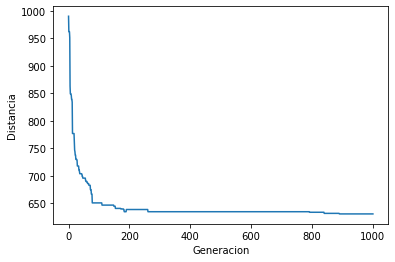

In [ ]:
#start_time = time.time()
algoritmoGenetico(poblacion=listaCiudades, pobTam=50, n_elite=5, probaMutar=0.001, generaciones = 1000)
#print(time.time() - start_time)

##### Graficamos el progreso obtenido en cada generación

NOTA IMPORTANTE: Aquí se corre de nuevo el algoritmo genético

In [ ]:
def algoritmoGenetico(poblacion, pobTam, n_elite, probaMutar, generaciones):
    pob = poblacionInicial(pobTam, poblacion)
    progreso = []
    progreso.append(1 / rankRutas(pob)[0][1])
    
    for i in range(0, generaciones):
        pob = proximaGeneracion(pob, n_elite, probaMutar)
        progreso.append(1 / rankRutas(pob)[0][1])
    
    plt.plot(progreso)
    plt.ylabel('Distancia')
    plt.xlabel('Generacion')
    plt.show()

Para ver la mejora en la distancia total depués de cada generación

In [ ]:
algoritmoGenetico(poblacion=listaCiudades, pobTam=150, n_elite=50, probaMutar=0.0001, generaciones = 10000)

KeyboardInterrupt: ignored

## Problemas de agrupamiento

In [28]:
"""
MLUtilities.py
"""
## Distancia eucilidiana:
def distEuclidiana(muestra, dataset):
    distancias = np.zeros((dataset.shape[0],1))
    for counter in range(0,dataset.shape[0]):
        distancias[counter] = np.linalg.norm(muestra-dataset[counter])
    return distancias

def centroideCercano(muestra, listaCentroides):
    listaDistancias = distEuclidiana(muestra, listaCentroides)
    centroideCercano = np.argmin(listaDistancias)
    return centroideCercano

def clasificarPorCentroides(muestras, centroides):
    resultado = np.zeros((muestras.shape[0],1))
    for counter in range(0, muestras.shape[0]):
        resultado[counter] = centroideCercano(muestras[counter], centroides)
    return resultado

def separarDatos(muestras, valoresEsperados, valorAFiltrar):
    indices = np.where(valoresEsperados == valorAFiltrar)
    return muestras[indices], valoresEsperados[indices]

def obtenerModa(resultados):
    moda = (stats.mode(resultados)[0]).reshape(-1)
    return moda[0]

def obtenerAccuracy_kmedias(muestras, centroides):
    numMuestras = muestras.shape[0]
    resultados = clasificarPorCentroides(muestras, centroides)
    moda = obtenerModa(resultados)
    indicesErrores = np.where(resultados != moda)
    cantidadErrores = len(resultados[indicesErrores])
    accuracy = ((numMuestras - cantidadErrores) / numMuestras) *100
    return accuracy

In [29]:
f1_df = pd.read_csv("https://raw.githubusercontent.com/AreYouRuben/DS_Team24/main/Analisis_Datos_Python_Santander/f1_dataset/lap_times.csv")
sns.set(style="whitegrid")
print("Colums : " + f1_df.columns)
cols = ["raceId","driverId", "position"]
print(f1_df[cols].head(5))
print(f1_df.loc[[1,10], cols])

Index(['Colums : raceId', 'Colums : driverId', 'Colums : lap',
       'Colums : position', 'Colums : time', 'Colums : milliseconds'],
      dtype='object')
   raceId  driverId  position
0     841        20         1
1     841        20         1
2     841        20         1
3     841        20         1
4     841        20         1
    raceId  driverId  position
1      841        20         1
10     841        20         1


In [30]:
# Get number of rebases
dictF1 = {} # raceId: numberRebases
last = f1_df.iloc[0]
print(last.raceId)
counter = 0
for i in range(1, f1_df.shape[0]):
  current = f1_df.iloc[i]
  if current.raceId == last.raceId and current.driverId == last.driverId and current.position < last.position:
    #print(last)
    counter += (last.position - current.position) # From last 6, to current 5
  # Add counter and reset counter
  if current.raceId != last.raceId:
    dictF1[last.raceId] = counter
    counter = 0
  last = current

print(dictF1)

841
{841: 189, 842: 280, 843: 289, 844: 373, 845: 292, 846: 210, 847: 0, 848: 188, 849: 203, 850: 201, 851: 253, 852: 250, 853: 137, 854: 248, 855: 304, 856: 211, 857: 132, 858: 181, 859: 205, 860: 210, 861: 384, 862: 377, 863: 354, 864: 354, 865: 136, 866: 212, 867: 351, 868: 125, 869: 230, 870: 168, 871: 174, 872: 273, 873: 354, 874: 187, 875: 138, 876: 113, 877: 233, 878: 174, 879: 419, 881: 277, 880: 320, 882: 321, 883: 353, 884: 330, 885: 138, 886: 150, 887: 377, 888: 276, 890: 232, 891: 211, 892: 158, 893: 254, 894: 282, 895: 207, 896: 280, 897: 213, 898: 100, 899: 218, 900: 107, 901: 169, 902: 263, 903: 163, 904: 236, 905: 101, 906: 215, 907: 238, 908: 125, 909: 242, 910: 277, 911: 224, 912: 153, 913: 217, 914: 232, 915: 129, 916: 181, 926: 48, 918: 47, 927: 274, 928: 157, 929: 173, 930: 166, 931: 71, 932: 108, 933: 79, 934: 92, 936: 220, 937: 136, 938: 115, 939: 146, 940: 142, 941: 149, 942: 153, 943: 136, 944: 198, 945: 174, 948: 178, 949: 303, 224: 94, 225: 180, 226: 196, 227

In [31]:
# Add this info to current dataframe
f1_resultsdf = pd.read_csv("https://raw.githubusercontent.com/AreYouRuben/DS_Team24/main/Analisis_Datos_Python_Santander/f1_dataset/results.csv")
f1_resultsdf["rebases"] = f1_resultsdf.apply(lambda row: dictF1[row.raceId] if row.raceId in dictF1 else 0, axis=1)
f1_resultsdf.head(10)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,rebases
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,134
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,134
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,134
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,134
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,134
5,6,18,6,3,8,13,6,6,6,3.0,57,\N,\N,50,14,1:29.639,212.974,11,134
6,7,18,7,5,14,17,7,7,7,2.0,55,\N,\N,22,12,1:29.534,213.224,5,134
7,8,18,8,6,1,15,8,8,8,1.0,53,\N,\N,20,4,1:27.903,217.180,5,134
8,9,18,9,2,4,2,\N,R,9,0.0,47,\N,\N,15,9,1:28.753,215.100,4,134
9,10,18,10,7,12,18,\N,R,10,0.0,43,\N,\N,23,13,1:29.558,213.166,3,134


In [32]:
f1_resultsdf.fillna(0)
x = f1_resultsdf[['driverId', 'grid', 'points','rebases']].to_numpy()
y = f1_resultsdf['raceId'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)
print(x_train)

[[197.  12.   0.   0.]
 [ 17.   5.  18. 277.]
 [347.  15.   0.   0.]
 ...
 [ 86.   0.   0.  92.]
 [289.   2.   9.   0.]
 [394.  21.   0.   0.]]


In [33]:
modelo_kmeans = KMeans(n_clusters = 12).fit(x_train)
centroides = modelo_kmeans.cluster_centers_
print(centroides)

[[ 2.78248922e+01  1.06438578e+01  2.99434267e+00  1.73100216e+02]
 [ 4.57571053e+02  1.09355263e+01  7.00184211e-01  8.95283847e-13]
 [ 7.36041475e+02  1.52580645e+01  7.00460829e-01 -2.20268248e-13]
 [ 1.62432004e+02  1.17044990e+01  7.79141104e-01  1.76022495e+00]
 [ 8.27039139e+02  1.20009785e+01  3.32387476e+00  1.28318982e+02]
 [ 6.06458075e+02  1.11863354e+01  1.16816770e+00  7.88702437e-13]
 [ 2.27006187e+02  1.08925759e+01  8.80202475e-01  1.23634436e-12]
 [ 3.39161148e+01  1.07842163e+01  2.65452539e+00  1.10889073e+02]
 [ 9.44276370e+01  1.13507768e+01  1.04394930e+00  1.57808667e-01]
 [ 2.93418803e+01  1.03726496e+01  4.48205128e+00  2.83336752e+02]
 [ 8.22069672e+02  1.33668033e+01  2.26229508e+00  2.58393443e+02]
 [ 3.38154696e+02  1.07209945e+01  1.15158840e+00  1.17950094e-12]]


### Recomendación

In [34]:
def recomiendameCarreras(listaDeCarreras,datosCarreras,carreraEjemplo,centroides):
    #Vamos a buscar el centroide mas cercano (con MLUtilities ;) )
    clasificacionDeseada = centroideCercano(carreraEjemplo, centroides)
    
    #Luego, vamos a clasificar todas las peliculas por centroides.
    clasificaciones = clasificarPorCentroides(datosCarreras, centroides)
    
    #Finalmente, sacaremos los indices que hacen match entre clasificaciones.
    indices = np.where(clasificaciones == clasificacionDeseada)[0]
    
    #Y regresamos la lista de peliculas.
    return listaDeCarreras[indices]

In [35]:
# Races CSV
f1_racedf = pd.read_csv("https://raw.githubusercontent.com/AreYouRuben/DS_Team24/main/Analisis_Datos_Python_Santander/f1_dataset/races.csv")

#Indice de carrera a evaluar
indice_df = 26

#Extrae la carrera que deseas del dataframe.
carreraElegida = f1_resultsdf.iloc[indice_df]

#Obten las características de la carrera que elegiste.
caracteristicaCarrera = carreraElegida[['driverId', 'grid', 'points','rebases']].to_numpy()

#Obten la lista de recomendaciones
recomendaciones = recomiendameCarreras(f1_resultsdf['raceId'],x, caracteristicaCarrera, centroides)

#E imprime lo que hallaste!
carrera = f1_racedf[f1_racedf['raceId'] == carreraElegida['raceId']]
#print(carrera[["name"]])
print("Porque viste " + carrera["name"].to_string())
print("Te recomendamos este Top 5 de carreras...")
#print(set(recomendaciones))
count = 0
top = 5
for elem in iter(set(recomendaciones)):
    if count == top:
        break
    print(f1_racedf[f1_racedf['raceId'] == elem]["name"].to_string())
    count = count + 1

Porque viste 18    Malaysian Grand Prix
Te recomendamos este Top 5 de carreras...
1011    Singapore Grand Prix
1    Malaysian Grand Prix
1013    Japanese Grand Prix
3    Bahrain Grand Prix
1014    Mexican Grand Prix
